In [31]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [32]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [33]:
X_train=pd.DataFrame(X_train['Hits'])
X_test=pd.DataFrame(X_test['Hits'])

In [34]:
from sklearn.svm import SVR

In [35]:
svr_model=SVR(kernel="linear").fit(X_train,y_train)

In [36]:
svr_model.predict(X_train)[0:10]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756, 666.91219512, 150.08292683, 304.13780488,
       507.88780488, 815.99756098])

In [37]:
y_pred = svr_model.predict(X_train)

In [38]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [40]:
y_pred = svr_model.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [42]:
svr_model

SVR(kernel='linear')

In [66]:
svr_params={"C":np.arange(0.01,4,0.1),'epsilon':np.arange(0.1,2,0.1)}
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [71]:
pd.Series(svr_cv_model.best_params_)

C          0.11
epsilon    0.10
dtype: float64

In [72]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [73]:
y_pred=svr_tuned.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred))

458.1989667811163

In [75]:
#trying non-linear

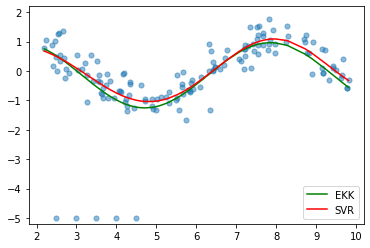

In [78]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);


In [79]:
svr_rbf=SVR(kernel='rbf').fit(X_train,y_train)

In [80]:
y_pred = svr_rbf.predict(X_test)

In [81]:
np.sqrt(mean_squared_error(y_test,y_pred))

462.64750060465025

In [83]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50],'gamma' :['scale', 'auto'],'epsilon':[0.01, 0.1,0.4,5,10,20,30,40,50],
              'degree':[0,1,2,3,4,5]}

In [85]:
svr_cv_model=GridSearchCV(svr_rbf,svr_params,cv=10)
svr_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50],
                         'degree': [0, 1, 2, 3, 4, 5],
                         'epsilon': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50],
                         'gamma': ['scale', 'auto']})

In [86]:
pd.Series(svr_cv_model.best_params_)

C             50
degree         0
epsilon       40
gamma      scale
dtype: object

In [102]:
svr_tuned=SVR(kernel='rbf',
    degree=0,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=50,
    epsilon=40).fit(X_train,y_train)

In [103]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

433.8838072474769